# How to find the best model parameters in Scikit-Learn?

Based on Machine Learning Practices by Kevin Markham

### Review of K-fold cross-validation

#### Steps for cross-validation:

- Dataset is split into K "folds" of equal size
- Each fold acts as the testing set 1 time, and acts as the training set K-1 times
- Average testing performance is used as the estimate of out-of-sample performance

#### Benefits of cross-validation:

- More reliable estimate of out-of-sample performance than train/test split
- Can be used for selecting tuning parameters, choosing between models, and selecting features

#### Drawbacks of cross-validation:

- Can be computationally expensive

### Review of PARAMETER TUNING (CALIBRACIÓN) using cross-validation (cross_val_score)

Iris Dataset: selecting the best parameters using cross-validation for KNN

In [3]:
# Loading Iris Dataset

from  sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
# importing KNN model and cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [9]:
# use average accuracy as an estimate of out-of-sample accuracy

scores.mean()

0.9666666666666668

In [10]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    print('K = %s, Score_mean = %s'%(k,scores.mean()))

K = 1, Score_mean = 0.96
K = 2, Score_mean = 0.9533333333333334
K = 3, Score_mean = 0.9666666666666666
K = 4, Score_mean = 0.9666666666666666
K = 5, Score_mean = 0.9666666666666668
K = 6, Score_mean = 0.9666666666666668
K = 7, Score_mean = 0.9666666666666668
K = 8, Score_mean = 0.9666666666666668
K = 9, Score_mean = 0.9733333333333334
K = 10, Score_mean = 0.9666666666666668
K = 11, Score_mean = 0.9666666666666668
K = 12, Score_mean = 0.9733333333333334
K = 13, Score_mean = 0.9800000000000001
K = 14, Score_mean = 0.9733333333333334
K = 15, Score_mean = 0.9733333333333334
K = 16, Score_mean = 0.9733333333333334
K = 17, Score_mean = 0.9733333333333334
K = 18, Score_mean = 0.9800000000000001
K = 19, Score_mean = 0.9733333333333334
K = 20, Score_mean = 0.9800000000000001
K = 21, Score_mean = 0.9666666666666666
K = 22, Score_mean = 0.9666666666666666
K = 23, Score_mean = 0.9733333333333334
K = 24, Score_mean = 0.96
K = 25, Score_mean = 0.9666666666666666
K = 26, Score_mean = 0.96
K = 27, Sco

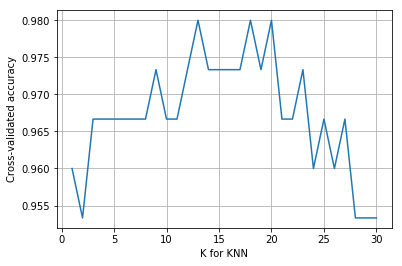

In [15]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.grid(True);

### PARAMETER TUNING using GridSearchCV (More Efficient)

In [17]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,31)

In [22]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': range(1, 31)}

In [26]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False)

In [27]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='accuracy', verbose=0)

In [29]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [30]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [32]:
grid_mean_scores = grid.cv_results_['mean_test_score']
grid_mean_scores

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

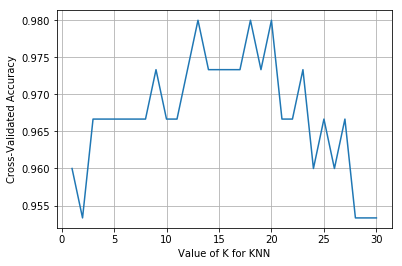

In [33]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True);

In [34]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


___As you can see, the result is the same as using cross-validation + loop for finding the best k fon knn___

### Testing multiple parameters simultaneously

- Example: tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
- Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, and vice versa
- But, best performance might be achieved when neither parameter is at its default value

In [36]:
# define the parameter values that should be searched

k_range = range(1,31)
weight_options = ['uniform','distance']

In [39]:
param_grid= dict(n_neighbors=k_range,weights=weight_options)
param_grid

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

In [40]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [41]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [43]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


___Best Model: k=13 weights= Uniform Accuracy=0.98___

### Using the best parameters to make predictions

In [44]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [46]:
knn.predict([[3,5,4,2]])

array([1])

### Reducing computational expense using RandomizedSearchCV
- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_dist =dict(n_neighbors=k_range,weights=['uniform','distance'])

In [62]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)

In [63]:
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=False, scoring='accuracy', verbose=0)

In [64]:
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [65]:
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [66]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]


[Time differences between GridSearchCV and RandomizedSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)

[Andreas Muller Talking about Scikit-Learn and Grid and Random methods](https://www.youtube.com/watch?v=0wUF_Ov8b0A&feature=youtu.be&t=17m38s)